In [1]:
# Leemos el archivo previamente generado con las opiniones en español y sus etiquetas

import pandas as pd
dataframe = pd.read_csv('../data/imbd_clean_es.csv')
dataframe.head(10)

clean_review_es  categoria
0  uno de los otros críticos ha mencionado que de...          1
1  una pequeña pequeña producciónla técnica de fi...          1
2  pensé que esta era una manera maravillosa de p...          1
3  básicamente hay una familia donde un niño pequ...          0
4  el amor en el tiempo de petter mattei es una p...          1
5  probablemente mi película favorita de todos lo...          1
6  seguro que me gustaría ver una resurrección de...          1
7  este espectáculo fue una idea increíble fresca...          0
8  alentados por los comentarios positivos sobre ...          0
9  si te gusta la risa original desgarradora te g...          1

In [2]:
# Carga de los textos y categorias a variables Python
opiniones_data = dataframe['clean_review_es'].to_list()
opiniones_target = dataframe['categoria'].to_list()

In [3]:
# Remoción de las palabras vacías (Stopwords)
from nltk.corpus import stopwords

spanish_stop_words = stopwords.words('spanish')
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split() 
                      if word not in spanish_stop_words])
        )
    return removed_stop_words

no_stop_words = remove_stop_words(opiniones_data)

In [4]:
# Filtrando más Stopwords (definidas por el usuario)
otros_stopwords = ['a','acá','ahí','al','algo','algún','alguna','alguno','algunas','algunos','allá','allí','ambos','ante',
                 'antes','aquel','aquella','aquello','aquellas','aquellos','aquí','arriba','así','atrás','aun','aunque',
                 'bien','cada','casi','como','con','cual','cuales','cualquier','cualquiera','cuan','cuando','cuanto','cuanta',
                 'cuantos','cuantas','de','del','demás','desde','donde','dos','el','él','ella','ello','ellas','ellos','en',
                 'eres','esa','ese','eso','esas','esos','esta','esto','estas','estos','este','etc','ha','hasta','la','lo','las',
                 'los','me','mi','mis','mía','mías','mío','míos','mientras','muy','ni','nosotras','nosotros','nuestra',
                 'nuestro','nuestras','nuestros','os','otra','otro','otras','otros','para','pero','pues','que','qué','si','sí',
                 'siempre','siendo','sin','sino','so','sobre','sr','sra','sres','sta','su','sus','te','tu','tus','un','una',
                 'uno','unas','unos','usted','ustedes','vosotras','vosotros','vuestra','vuestro','vuestras','vuestros','y','ya',
                 'yo']

for i in range(len(no_stop_words)):
    for element in otros_stopwords:
        no_stop_words[i] = no_stop_words[i].replace(" " + str(element) + " ", " ")

print("Uno de los texto sin Stopwords:")
no_stop_words[50]

Uno de los texto sin Stopwords:


'volver 36ª cámara películas clásicas kungfu shaw produce nuevo años 70 80 cuyo género equivalente occidentales espaguetis hollywood protagonista gordon liu contraparte westerns clint eastwood digitalmente remasterizado nueva impresión hecha fantástico festival cine presentado alcance shaw buenos viejos tiempos película historia simple buenas versos contada 3 actos menos sumas sube narrativa películas artes marciales época establece premisa trabajadores molino tinte pequeño pueblo contentos lote salario reducido 20 gangsters entrantes manchu pueden hacer explotación ninguno expertos artes marciales asumir pandilleros jefe principio éxito menor liu hiciera imponer monje shaolin altamente calificado mejores secuencias comedia despertamiento expuso empujaron límite credibilidad hacerse pasar demasiadas veces muestran protagonista queriendo volver mafia embargo artes marciales reales embarca viaje shaolin temple intentar infiltrarse aprender artes marciales sly después momentos slapstick f

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split

# Convirtiendo la lista de targets en un tensor de numpy
opiniones_target = np.array(opiniones_target)

# Separación de la información en conjuntos de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(no_stop_words, opiniones_target, test_size=0.20)

In [6]:
from keras.preprocessing.text import Tokenizer

# Preparamos la capa de embeddings (se predefinen 5000 palabras - tokens)
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

# Transformando cada texto en una secuencia de valores enteros
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [7]:
from keras_preprocessing.sequence import pad_sequences

# Conversión de los conjuntos de entrenamiento a vectores 
maxlen = 100

# Aquellos mayores a 100 son truncados, y los menores les 
# es replicado su último valor para tener arreglos
# bidimensionales del mismo tamaño (Usar el método para padding)
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print("Matriz de valores para las palabras:")
X_train

Matriz de valores para las palabras:


array([[1885, 1625,  250, ..., 1493,  540,  335],
       [ 531,  207,  676, ...,    0,    0,    0],
       [ 601,   67,  670, ...,  607,    7,   47],
       ...,
       [ 514, 1591,   85, ...,    0,    0,    0],
       [ 304, 1478,  535, ...,   49, 1361, 1951],
       [ 129,  115,  341, ...,  361, 2574, 3016]])

In [8]:
# Verificar que la información de entrada 
print(f'X_train -> {X_train}')
print(f'y_train -> {y_train}')

X_train -> [[1885 1625  250 ... 1493  540  335]
 [ 531  207  676 ...    0    0    0]
 [ 601   67  670 ...  607    7   47]
 ...
 [ 514 1591   85 ...    0    0    0]
 [ 304 1478  535 ...   49 1361 1951]
 [ 129  115  341 ...  361 2574 3016]]
y_train -> [0 0 1 ... 0 0 1]


In [9]:
# Declaración de librerías para manejo de arreglos (Numpy)
from numpy import asarray
from numpy import zeros

# Lectura del archivo de embeddings
embeddings_dictionary = dict()
embeddings_file = open('../data/Word2Vect_Spanish.txt', encoding="utf8")

# Extracción de las características del archivo de embeddings
# y se agregan a un diccionario (Cada elemento es un vector)
for linea in embeddings_file:
    caracts = linea.split()
    palabra = caracts[0]
    vector = asarray(caracts[1:], dtype='float32')
    embeddings_dictionary [palabra] = vector
embeddings_file.close()

In [10]:
# Extracción de la cantidad de palabras en el vocabulario
vocab_size = len(tokenizer.word_index) + 1

# Generación de la matriz de embeddings (De entrada llena de ceros)
embedding_matrix = zeros((vocab_size, 300))
for word, index in tokenizer.word_index.items():
    # Extracción del vector de embeddings para cada palabra
    embedding_vector = embeddings_dictionary.get(word)
    # Si la palbra si existía en el vocabulario
    # se agrega a su vector de embeddings en la matriz
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [11]:
embedding_matrix.shape

(256401, 300)

## Red neuronal profunda (DNN)

In [12]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import Flatten
from keras.layers.core import Dense

# Definición de las capas de nuestro modelo neuronal (DNN)
# El modelo será secuencial (y se ingresa cada capa en el orden de configuración de la red neuronal)
model = Sequential()
#model._name='Red neuronal profunda DNN'
# Se definen los valores para nuestra capa de Embeddings
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen, trainable=False)
# Se agregan 3 capas al modelo; una de Embeddings, una de aplanamiento y una Profunda con una Dense con una salida
# y una activación Sigmoidal)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
# Se definen los métodos de optimización, las métricas a utilizar y como calcular la pérdida
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# Se imprime la información del modelo definido
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 300)          76920300  
                                                                 
 flatten (Flatten)           (None, 30000)             0         
                                                                 
 dense (Dense)               (None, 1)                 30001     
                                                                 
Total params: 76,950,301
Trainable params: 30,001
Non-trainable params: 76,920,300
_________________________________________________________________
None


In [13]:
# Se utiliza el método fit para ajustar los datos del modelo a la configuración definida
history = model.fit(X_train, y_train, batch_size=128, epochs=8, verbose=1, validation_split=0.2)
# Se utilizamos le método evaluate para determinar la pérdida y el accuracy del modelo
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Loss:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/8
250/250 [==============================] - 2s 6ms/step - loss: 0.6191 - acc: 0.6793 - val_loss: 0.5743 - val_acc: 0.7209
Epoch 2/8
250/250 [==============================] - 1s 6ms/step - loss: 0.5231 - acc: 0.7706 - val_loss: 0.5367 - val_acc: 0.7452
Epoch 3/8
250/250 [==============================] - 2s 7ms/step - loss: 0.4759 - acc: 0.7971 - val_loss: 0.5289 - val_acc: 0.7425
Epoch 4/8
250/250 [==============================] - 2s 7ms/step - loss: 0.4438 - acc: 0.8154 - val_loss: 0.5126 - val_acc: 0.7585
Epoch 5/8
250/250 [==============================] - 2s 7ms/step - loss: 0.4182 - acc: 0.8322 - val_loss: 0.5072 - val_acc: 0.7588
Epoch 6/8
250/250 [==============================] - 2s 7ms/step - loss: 0.3984 - acc: 0.8428 - val_loss: 0.5094 - val_acc: 0.7520
Epoch 7/8
250/250 [==============================] - 2s 7ms/step - loss: 0.3800 - acc: 0.8533 - val_loss: 0.5022 - val_acc: 0.7592
Epoch 8/8
313/313 [==============================] - 1s 5ms/step - loss: 0.5057 - a

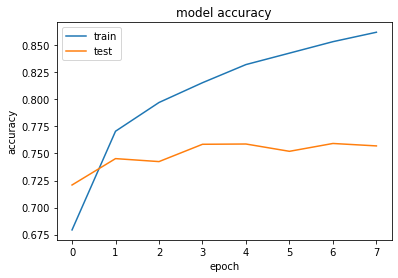

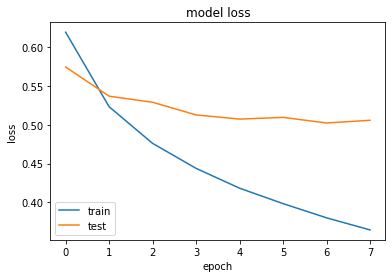

In [14]:
# Se imprime la eficiencia y la pérdida del modelo
# época a época para ver su evolución
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower left')
plt.show()

## Red neuronal convolucional (CNN)

In [15]:
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, Conv1D, LSTM, GlobalMaxPooling1D

# Se declara el modelo Secuencial 
model = Sequential()
model._name='Red_convolucional_CNN'

# Se declaran las capas del modelo convolucional
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Conv1D(64, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(256, 3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
# Se imprime la información del modelo que definimos
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "Red_convolucional_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 300)          76920300  
                                                                 
 conv1d (Conv1D)             (None, 98, 64)            57664     
                                                                 
 conv1d_1 (Conv1D)           (None, 96, 128)           24704     
                                                                 
 conv1d_2 (Conv1D)           (None, 94, 256)           98560     
                                                                 
 global_max_pooling1d (Globa  (None, 256)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                             

In [16]:
# Se utiliza el método fit para ajustar los datos del modelo a la configuración definida
history = model.fit(X_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2)
# Se utiliza evaluate para determinar la pérdida y el accuracy del modelo
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/20
250/250 [==============================] - 6s 13ms/step - loss: 0.5220 - acc: 0.7306 - val_loss: 0.4472 - val_acc: 0.7876
Epoch 2/20
250/250 [==============================] - 3s 12ms/step - loss: 0.4273 - acc: 0.8010 - val_loss: 0.4235 - val_acc: 0.8020
Epoch 3/20
250/250 [==============================] - 3s 12ms/step - loss: 0.3879 - acc: 0.8241 - val_loss: 0.4654 - val_acc: 0.7793
Epoch 4/20
250/250 [==============================] - 3s 12ms/step - loss: 0.3535 - acc: 0.8455 - val_loss: 0.4356 - val_acc: 0.8011
Epoch 5/20
250/250 [==============================] - 3s 11ms/step - loss: 0.3208 - acc: 0.8614 - val_loss: 0.4169 - val_acc: 0.8184
Epoch 6/20
250/250 [==============================] - 3s 12ms/step - loss: 0.2899 - acc: 0.8772 - val_loss: 0.4211 - val_acc: 0.8127
Epoch 7/20
250/250 [==============================] - 3s 12ms/step - loss: 0.2534 - acc: 0.8943 - val_loss: 0.4475 - val_acc: 0.8180
Epoch 8/20
250/250 [==============================] - 3s 11ms/step - 

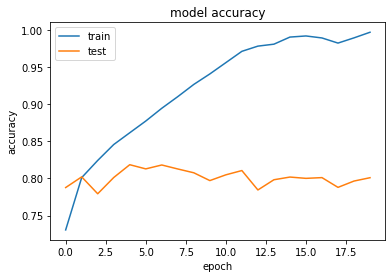

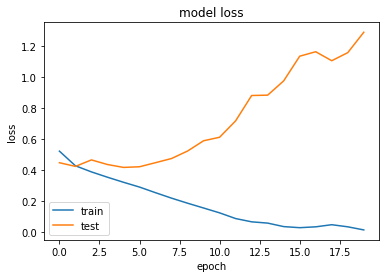

In [17]:
# Se imprime la eficiencia y la pérdida del modelo
# época a época para ver su evolución

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower left')
plt.show()

## Red LSTM

In [18]:
from keras.layers import LSTM
from keras.layers.core import Dense
from keras.layers import Embedding

# Se declara el modelo Secuencial 
model = Sequential()
model._name='Red_LSTM'

# Se declaran las capas del modelo LSTM
embedding_layer = Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))

# Se imprime la información del modelo definido
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "Red_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 300)          76920300  
                                                                 
 lstm (LSTM)                 (None, 256)               570368    
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 77,490,925
Trainable params: 570,625
Non-trainable params: 76,920,300
_________________________________________________________________
None


In [19]:
# Se utiliza el método fit para ajustar los datos del modelo a la configuración definida
history = model.fit(X_train, y_train, batch_size=128, epochs=25, verbose=1, validation_split=0.2)
# Se utiliza el método evaluate para determinar la pérdida y el accuracy del modelo
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Epoch 1/25
250/250 [==============================] - 10s 36ms/step - loss: 0.6903 - acc: 0.5395 - val_loss: 0.6897 - val_acc: 0.5268
Epoch 2/25
250/250 [==============================] - 9s 35ms/step - loss: 0.6137 - acc: 0.6458 - val_loss: 0.5003 - val_acc: 0.7561
Epoch 3/25
250/250 [==============================] - 8s 34ms/step - loss: 0.4924 - acc: 0.7686 - val_loss: 0.5044 - val_acc: 0.7800
Epoch 4/25
250/250 [==============================] - 9s 35ms/step - loss: 0.4575 - acc: 0.7886 - val_loss: 0.4426 - val_acc: 0.7984
Epoch 5/25
250/250 [==============================] - 8s 34ms/step - loss: 0.4380 - acc: 0.8000 - val_loss: 0.4236 - val_acc: 0.8016
Epoch 6/25
250/250 [==============================] - 8s 32ms/step - loss: 0.4153 - acc: 0.8097 - val_loss: 0.4055 - val_acc: 0.8124
Epoch 7/25
250/250 [==============================] - 8s 33ms/step - loss: 0.4022 - acc: 0.8177 - val_loss: 0.3988 - val_acc: 0.8206
Epoch 8/25
250/250 [==============================] - 8s 34ms/step -

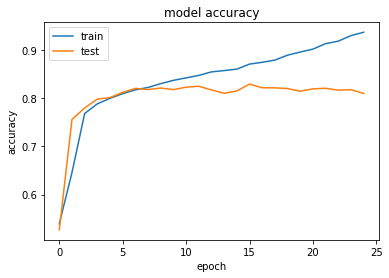

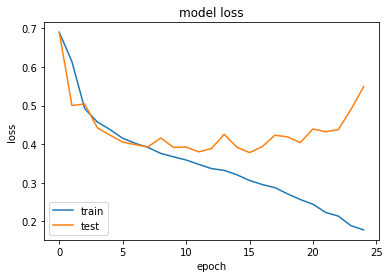

In [20]:
# Se imprime la eficiencia y la pérdida del modelo
# época a época para ver su evolución
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='lower left')
plt.show()